# Import Libraries

In [ ]:
from google.colab import drive
import os
import shutil
import matplotlib.pyplot as plt

# A class to Move Images

In [ ]:
class MoveImages:
  def __init__(self, dataset_path):
    self.dataset_path = dataset_path
    self.words = ["glioma", "meningioma", "no tumor", "pituitary"]
    self.merged_prefix = "merged"

    drive.mount('/content/drive')

  def get_all_folders(self, path):
    folders = [path]
    for item in os.listdir(path):
      full_path = os.path.join(path, item)
      if os.path.isdir(full_path):
        folders.extend(self.get_all_folders(full_path))
    return folders

  def get_specific_paths(self, word):
    matched = []
    all_folders = self.get_all_folders(self.dataset_path)
    for fol in all_folders:
      name = os.path.basename(fol).lower()
      if word.lower() in fol.lower() and not name.startswith(self.merged_prefix):
        matched.append(fol)
    return matched

  def make_merged_directory(self, name):
    merged_folder = os.path.join(self.dataset_path, f"{self.merged_prefix}_{name}")
    os.makedirs(merged_folder, exist_ok=True)
    return merged_folder

  def copy_unique_files(self, src_folder, dest_folder):
    for filename in os.listdir(src_folder):
      src_file = os.path.join(src_folder, filename)
      if os.path.isfile(src_file):
        dest_file = os.path.join(dest_folder, filename)
        if not os.path.exists(dest_file):
          shutil.copy2(src_file, dest_file)
        else:
          # print(f"Duplicate skipped: {filename}")
          pass

  def do_all_processes(self):
    for word in self.words:
      print(f"\nProcessing class: {word}")
      merged_folder = self.make_merged_directory(word)
      source_folders = self.get_specific_paths(word)

      for src in source_folders:
        self.copy_unique_files(src, merged_folder)
        print(f"✔ Copied from {src}")

In [ ]:
mri_dataset_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/Raw Dataset/MRI Dataset"
mover = MoveImages(mri_dataset_path)
mover.do_all_processes()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processing class: glioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/Raw Dataset/MRI Dataset/Testing/glioma_testing
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/Raw Dataset/MRI Dataset/Glioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/Raw Dataset/MRI Dataset/Validation/Glioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/Raw Dataset/MRI Dataset/Top View(Glioma)
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/Raw Dataset/MRI Dataset/Top View Validation/Glioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/Raw Dataset/MRI Dataset/Top View Testing/Glioma

Processing class: meningioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Pro

In [ ]:
merged_glioma_len = len(os.listdir(os.path.join(mri_dataset_path, "merged_glioma")))
merged_meningioma_len = len(os.listdir(os.path.join(mri_dataset_path, "merged_meningioma")))
merged_no_tumor_len = len(os.listdir(os.path.join(mri_dataset_path, "merged_no tumor")))
merged_pituitary_len = len(os.listdir(os.path.join(mri_dataset_path, "merged_pituitary")))
total_images = merged_glioma_len + merged_meningioma_len + merged_no_tumor_len + merged_pituitary_len

print("merged_glioma_len:", merged_glioma_len)
print("merged_meningioma_len:", merged_meningioma_len)
print("merged_no_tumor_len:", merged_no_tumor_len)
print("merged_pituitary_len:", merged_pituitary_len)
print("total_images:", total_images)

merged_glioma_len: 10209
merged_meningioma_len: 10346
merged_no_tumor_len: 1840
merged_pituitary_len: 8203
total_images: 30598


In [ ]:
classes = ["glioma", "meningioma", "no tumor", "pituitary"]
counts = [merged_glioma_len, merged_meningioma_len, merged_no_tumor_len, merged_pituitary_len]

# Bar plot to show class distribution/ imbalance

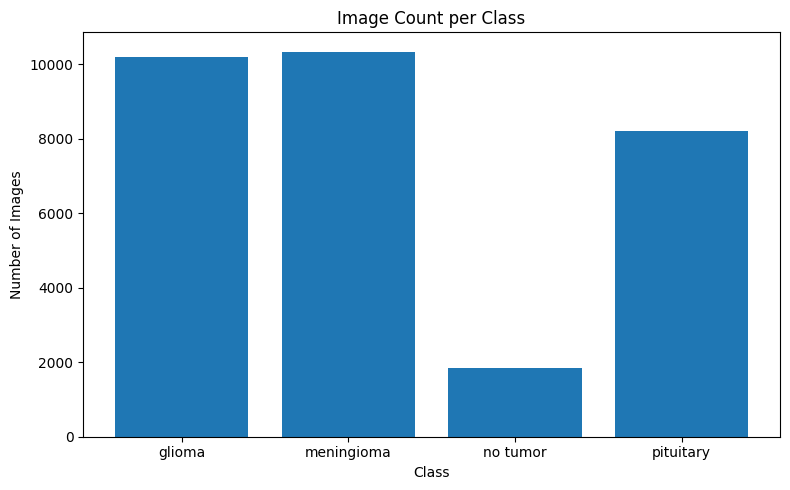

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(classes, counts)
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

# Class proportions

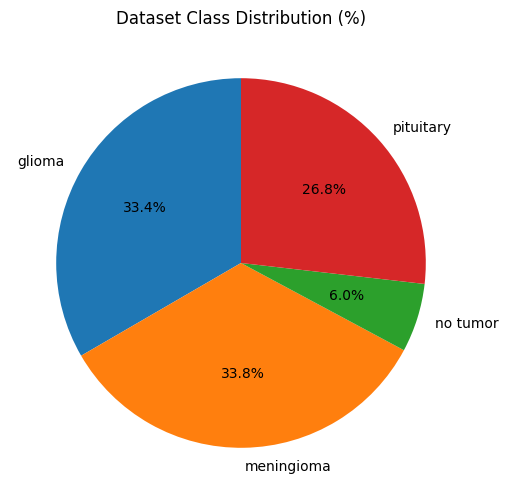

In [ ]:
percentages = [merged_glioma_len / total_images, merged_meningioma_len / total_images, merged_no_tumor_len / total_images, merged_pituitary_len / total_images]

plt.figure(figsize=(6, 6))
plt.pie(
    percentages,
    labels=classes,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Dataset Class Distribution (%)")
plt.show()

# Class imbalance ratio plot

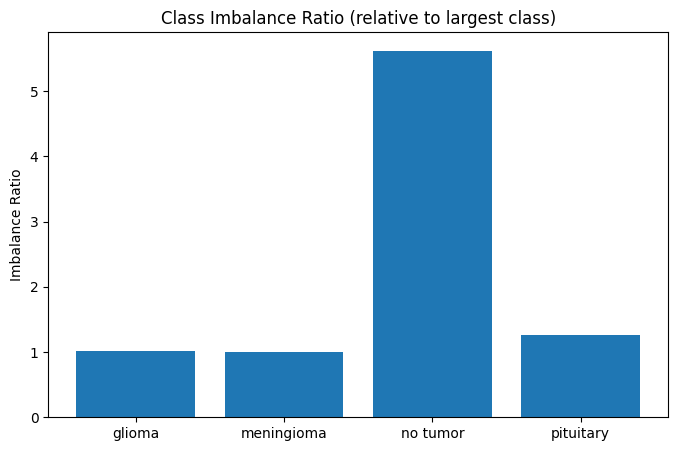

In [ ]:
max_count = max(counts)
imbalance_ratio = [max_count / c for c in counts]

plt.figure(figsize=(8, 5))
plt.bar(classes, imbalance_ratio)
plt.title("Class Imbalance Ratio (relative to largest class)")
plt.ylabel("Imbalance Ratio")
plt.show()